# Machine Learning Approach For Heart Attack Prediction
# UCI DATASET

## Importing Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

## Importing Data

In [59]:
path = r"D:\Materials\Materials  o6u\LEVEL 3 AI Specialization\Semester 2\Fundamental of DataSceince\Papers\project paper\HeartDiseaseTrain-Test.csv"
df = pd.read_csv(path)
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


## view First five rows

In [60]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


## Information of the dataframe

In [61]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

## There is no null in the data

In [62]:
df.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

## Number of people that may be have Heart Attack

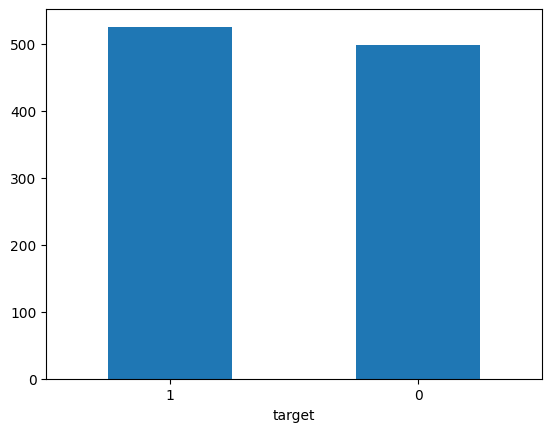

In [63]:
df["target"].value_counts().plot(kind="bar")
plt.tick_params(labelrotation=0)
plt.show()

## Distribution of Ages in the data

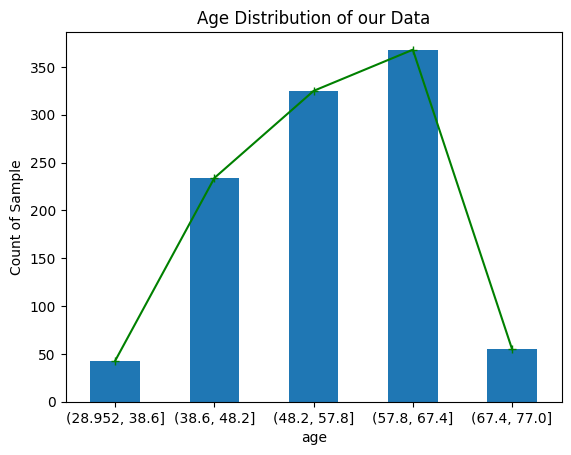

In [64]:
df.age.groupby(pd.cut(df.age, 5),observed=False).count().plot(kind="bar")
df.age.groupby(pd.cut(df.age, 5),observed = False).count().plot(kind="line", marker='+', color="Green")
plt.tick_params(labelrotation=0)
plt.title("Age Distribution of our Data")
plt.ylabel("Count of Sample")
plt.show()

## Age Wise Disease distribution

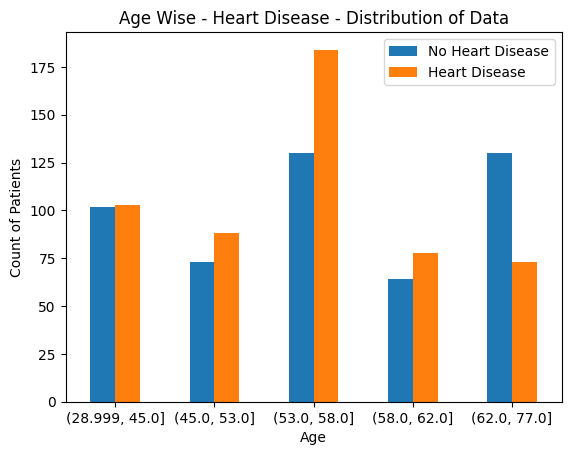

In [65]:
pd.crosstab(df.age, df.target).groupby(pd.qcut(df.age, 5),observed=False).sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xlabel("Age")
plt.ylabel("Count of Patients")
plt.title("Age Wise - Heart Disease - Distribution of Data")
plt.show()

## Resting Blood Pressure Level in Correlation With Heart Disease

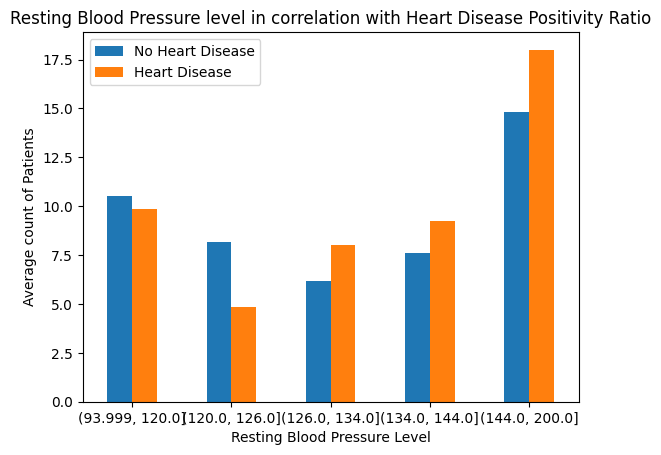

In [66]:
pd.crosstab(df.resting_blood_pressure,df.target).groupby(pd.qcut(df.resting_blood_pressure, 5),observed=False).mean().plot(kind="bar")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.ylabel("Average count of Patients")
plt.xlabel("Resting Blood Pressure Level")
plt.title("Resting Blood Pressure level in correlation with Heart Disease Positivity Ratio")
plt.tick_params(labelrotation=0)
plt.show()

## Cholestoral Level correlation with Heart Disease

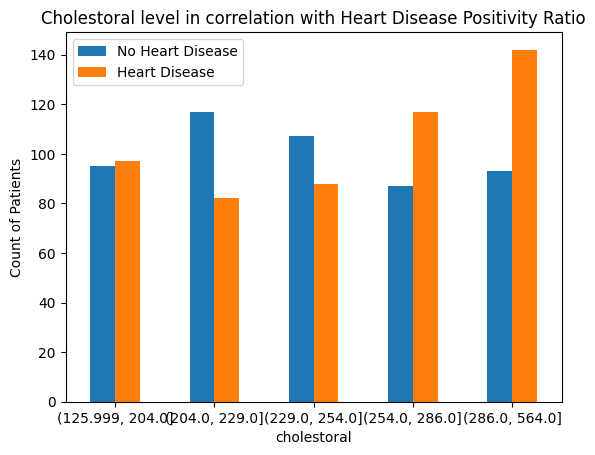

In [67]:
pd.crosstab(df.cholestoral,df.target).groupby(pd.qcut(df.cholestoral, 5),observed=False).sum().plot(kind="bar")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.ylabel("Count of Patients")
plt.title("Cholestoral level in correlation with Heart Disease Positivity Ratio")
plt.xticks(rotation=0)
plt.show()

## Chest Pain Type according to the disease 

### Here we can see that in Typical Angina chest pain patient have more chances of not having Heart Disease
#### 
Non Anginal Pain has more chances of patient having Heart Disease

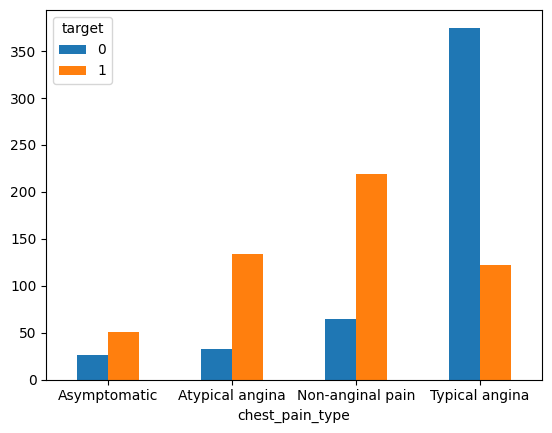

In [68]:
pd.crosstab(df.chest_pain_type, df.target).plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

## Counting the values of rest_ecg feature

In [69]:
df["rest_ecg"].value_counts()

rest_ecg
ST-T wave abnormality           513
Normal                          497
Left ventricular hypertrophy     15
Name: count, dtype: int64

## Converting the categorical features to numerical 

In [70]:
# Replacing Data in Sex Column
df["sex"].replace({"Male" : 1,
                   "Female" : 0}, inplace=True)

# Replacing CP Column
df["chest_pain_type"].replace({"Typical angina" : 0,
                                  "Atypical angina" : 1,
                                  "Non-anginal pain" : 2,
                                  "Asymptomatic" : 3}, inplace=True)

# Replacing Data in FBS
df["fasting_blood_sugar"].replace({"Greater than 120 mg/ml" : 1,
                                   "Lower than 120 mg/ml" : 0}, inplace=True)

# Replacing Data in restecg
df["rest_ecg"].replace({"Normal" : 0,
                       "ST-T wave abnormality" : 1,
                       "Left ventricular hypertrophy" : 2}, inplace=True)

# Replacing Data in exang
df["exercise_induced_angina"].replace({"Yes" : 1,
                                       "No" : 0}, inplace=True)

# Replacing Data in slope
df["slope"].replace({"Upsloping" : 0,
                     "Flat" : 1,
                     "Downsloping" : 2}, inplace=True)

# Replacing Vessels_colored_by_flourosopy
df["vessels_colored_by_flourosopy"].replace({"Zero" : 0,
                                             "One" : 1,
                                             "Two" : 2,
                                             "Three" : 3,
                                             "Four" : 4}, inplace=True)

# Replacing Data in thal
df["thalassemia"].replace({"Normal" : 3,
                        "Fixed Defect" : 6,
                        "Reversable Defect" : 7,
                          "No" : 0}, inplace=True)
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,7,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,7,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,7,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,7,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,6,0


## Correlation Matrix

 ### From this Correlation Matrix We can infere -
 Chest Pain Type, Max Heart Rate, Slope, Excericse Induced Angina, Oldpeak and Vessel Color are having high Correlation with a patient having Heart Disease
 Fasting Blood Sugar is having the lowest correlation with our target for this data.
 The slope of the peak exercise ST segment and OldPeak are highly correlated on each other

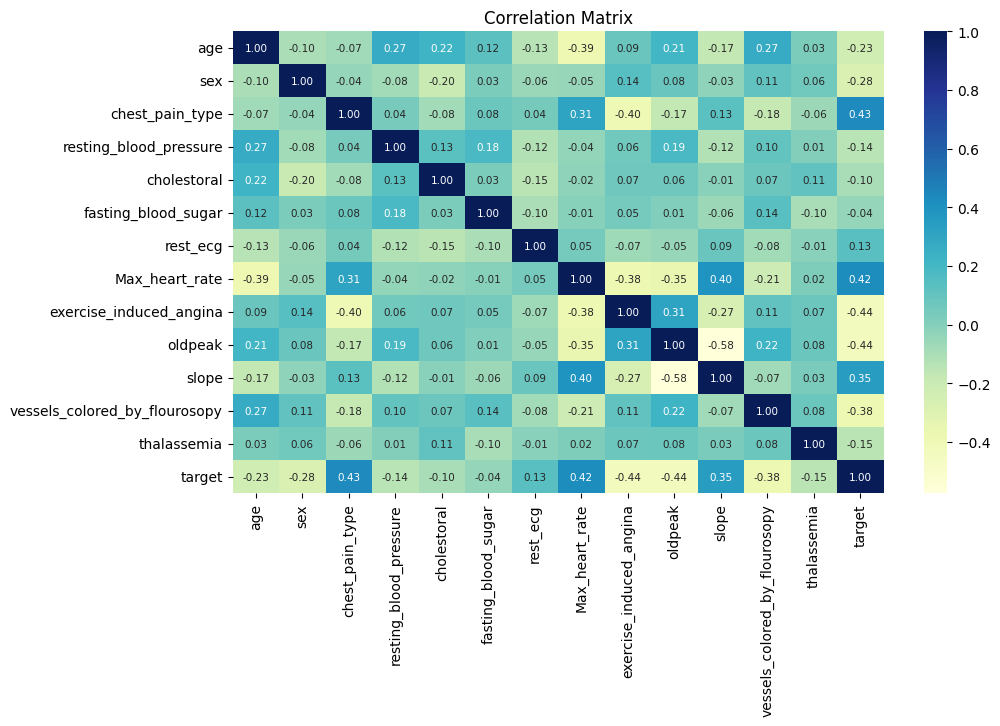

In [71]:
fig, ax = plt.subplots(figsize=(10.5,6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={"size": 7.5})
plt.title("Correlation Matrix")
plt.show()

# Feature Scaling 
Since we want to try out different models, and also these that use distance as a measure, we will scale our features.

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [73]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,0.529878,0.695610,0.314146,0.354827,0.273973,0.149268,0.264878,0.596291,0.336585,0.172825,0.692683,0.188537,0.881672,0.513171
std,0.189006,0.460373,0.343214,0.165252,0.117791,0.356527,0.263939,0.175616,0.472772,0.189525,0.308878,0.257699,0.155148,0.500070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.465649,0.000000,0.000000,0.500000,0.000000,0.857143,0.000000
50%,0.562500,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.618321,0.000000,0.129032,0.500000,0.000000,0.857143,1.000000
75%,0.666667,1.000000,0.666667,0.433962,0.340183,0.000000,0.500000,0.725191,1.000000,0.290323,1.000000,0.250000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Check Resampling imbalanced Dataset
Checking balance of outcome variable

Class 0: 499
Class 1: 526
Proportion: 0.95 : 1


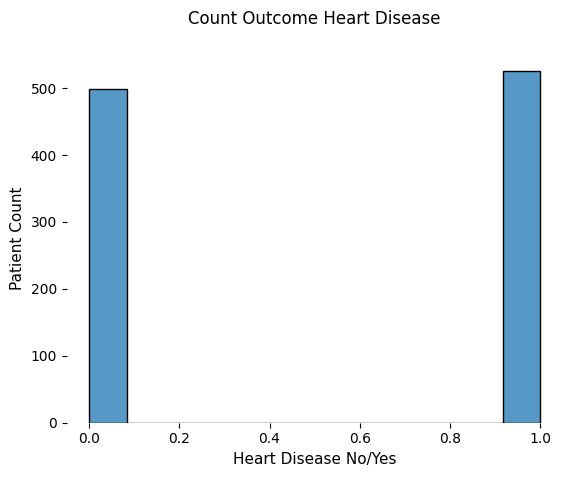

In [74]:
target_count = df.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.histplot(df.target, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

## Getting Features and Target Data ready for Use

In [75]:
X = df.drop("target", axis=1) # Feature data (Independant Dataset)
y=df["target"] # Target Data (Dependant Dataset)
# Shape Function show the number of rows and number of features so sahpe x is 1025 row for each the 13 feature and y is just the target which is one column with 1025 row
X.shape, y.shape

((1025, 13), (1025,))

## Modeling

Splitting X and Y Data in Train and Test Data,
Then Fitting the train data to the model.
And Checking the score for the Created Model.
    
model_dict = Model Dictionery (Dictionery of Model we have selected)
X = Feature Labels
y = Target Data
test_size = Test Split Size to split data in Test and Train sets

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

warnings.filterwarnings("ignore")

model_dict = {"Logistic_Regression" : LogisticRegression(),
              "Decision_Tree" : DecisionTreeClassifier(),
              "Gradient_Boosting" : GradientBoostingClassifier(),
              "Random_Forest" : RandomForestClassifier(),
              "KNN_Classifier" : KNeighborsClassifier(),
             "SVM" : SVC()}

def model_fit_and_score(model_dict, X, y, test_size=0.30):
    
    model_score={} # Dictionary to append Scores of fitted model
    
    np.random.seed(41) # To get same values every time
    # Splitting Data in Train and Test Splits
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    for name, model in model_dict.items():
        # Fit Model
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
    scores = pd.DataFrame(model_score, index=["Score"])
    scores.T.plot(kind="bar")
    plt.title("Scores of these Models")
    plt.xticks(rotation=0)
    plt.xlabel("Model Name")
    plt.ylabel("Score of Model")
    return scores

,Logistic_Regression,Decision_Tree,Gradient_Boosting,Random_Forest,KNN_Classifier,SVM
Score,0.831169,0.99026,0.957792,0.99026,0.847403,0.86039


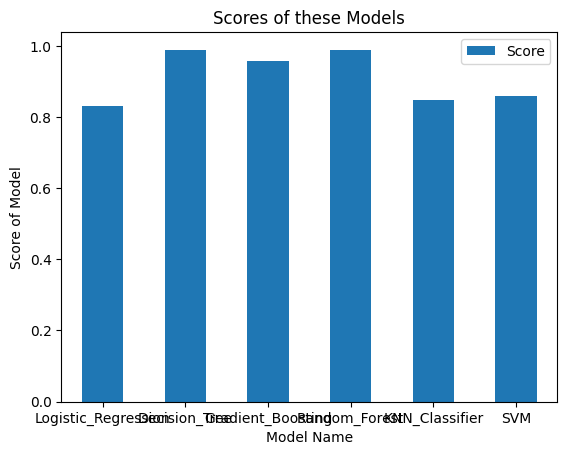

In [77]:
model_fit_and_score(model_dict, X, y, test_size=0.30)

## Cross Validation for Models in Model Dictionary
### Providing Mean value of cross validation for each Parameter
    
Parameter Includes : accuracy, precision, recall, f1_micro, f1_macro
    
model_dict : Model Dictionery with/without parameter tuning
    X : Feature Data
    y : Target Data
    cv : Cross Validation folds (Default = 5)

In [78]:
def model_cross_val_score(model_dict, X, y, cv=5):
    warnings.filterwarnings("ignore")
    
    scoring_param = ["accuracy", "precision", "recall", "f1_micro", "f1_macro"]
    
    cv_score = {} # To append Scores of each Model
     
    
    np.random.seed(42)
    for name, model in model_dict.items():
        cv_score[name] = {}
        for param in scoring_param:
            # Calculating Mean values for cross validation with each Parameter
            score = np.mean(cross_val_score(model, X, y, scoring=param, cv=cv))
            cv_score[name][param] = score 
    cv = pd.DataFrame(data=cv_score)
    return cv

In [79]:
model_cross_val_score(model_dict, X, y, cv=5)

,Logistic_Regression,Decision_Tree,Gradient_Boosting,Random_Forest,KNN_Classifier,SVM
accuracy,0.844878,1.000000,0.963902,0.997073,0.840976,0.895610
precision,0.820902,1.000000,0.966067,0.994495,0.861634,0.879405
recall,0.893621,0.986667,0.963899,1.000000,0.825085,0.924061
f1_micro,0.844878,0.996098,0.963902,0.994146,0.840976,0.895610
f1_macro,0.843966,1.000000,0.963873,0.997066,0.840850,0.895280


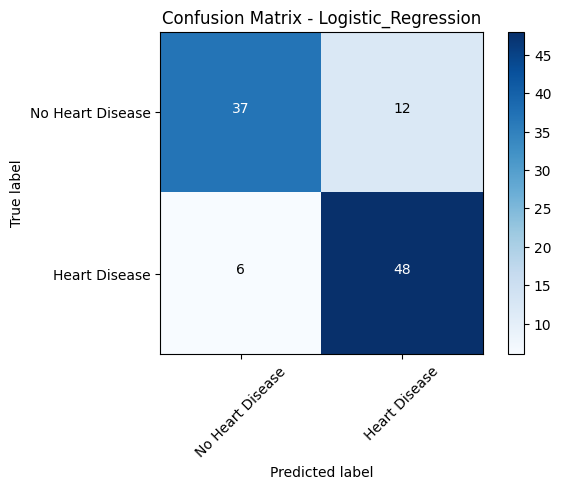

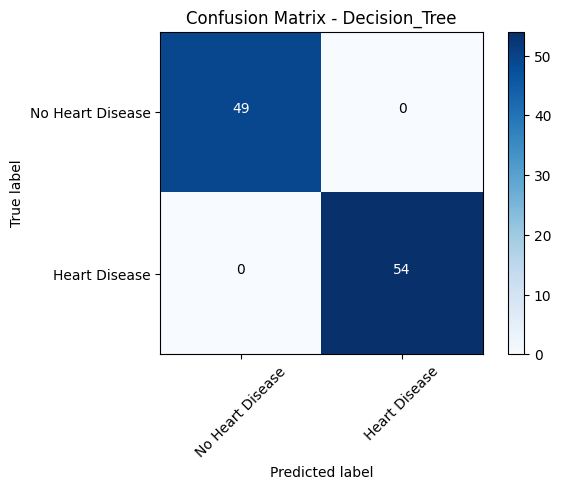

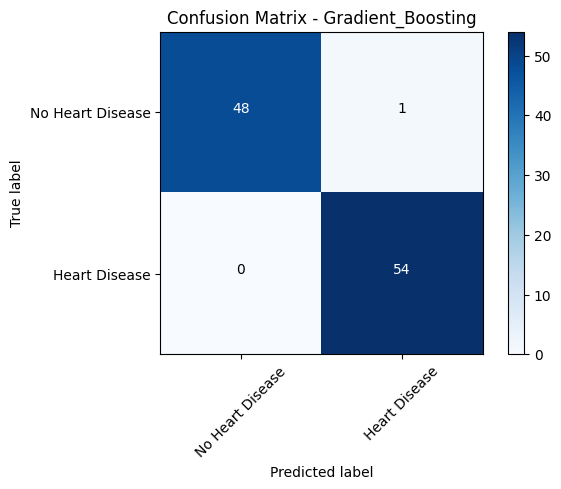

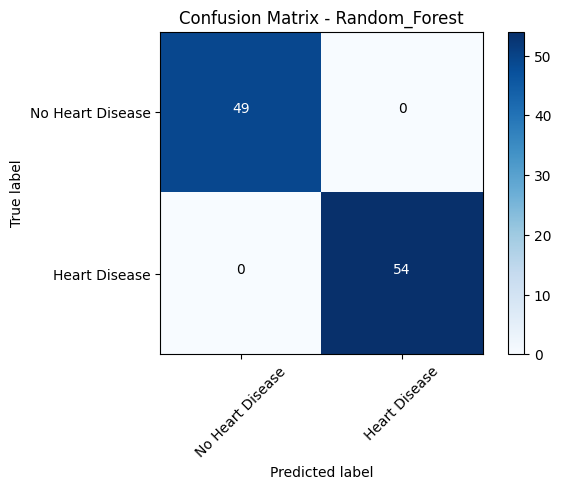

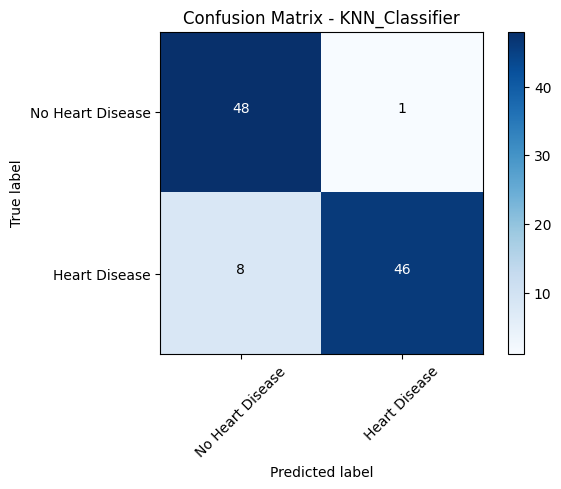

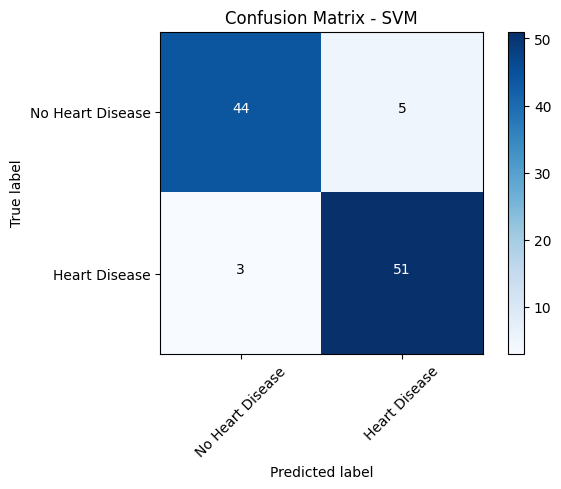

In [80]:
from sklearn.metrics import confusion_matrix
import itertools

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Function to calculate and plot confusion matrix for each classifier
def plot_confusion_matrices(model_dict, X, y, test_size=0.10):
    np.random.seed(41) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    for name, model in model_dict.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cnf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['No Heart Disease', 'Heart Disease'], title=f'Confusion Matrix - {name}')

# Calling the function
plot_confusion_matrices(model_dict, X, y, test_size=0.10)
plt.show()
